# HANWRITTEN DIGIT RECOGNITION USING MNIST DATA SETS AND DEEP LEARNING

* OPIMISATION FN USED -> GRADIENT DESCENT
* Activation fn is Relu in inner layer and sigmoid in last layer
* first 10000 data used for training and next 5000 for testing

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #importing libraray
import math
import scipy.optimize as opt

In [2]:
def relu(z):
    z[z<=0]=0
    
    return z
def relu_grad(z):
    z[z>=0]=0.9999
    z[z<0]=0
    return z
        
        
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  #sigmoid fn
def sigmoidgrad(z): #it compute derivate of sigmoid of the fn
    return sigmoid(z)*(1-sigmoid(z))

print(sigmoidgrad(0))


0.25


In [3]:
data = pd.read_csv('C:\\Users\\PRASHANT\\Desktop\\coding dec19\\file_neural\\train.csv\\train.csv')

* data is present inside a csv file which is loaded using pandas
* data is 4000 X 785 size matrix 
* 784 column is for 28 X 28 pixel image
* first column for output
* and next 784 column represent one pixel
* each pixel contain value denoting intensity from 0 to 255 we regularize all column to obtain between -2 to +2
* output Y is 10000 X 1 matrix , which actually represnt that no 
* we take out 1th column to 784th as X and  transpose it
* we take out 0th column in Y

* we comput y1 matrix which is 10000 X 10 matrix which contain 1 at poition which is value of Y in that row
* we compute A2 matrix which result of forward propagation 
* from A3 we compute ouput matrix which contain digit from 1 to 9 in 5000 X 1 matrix
* we compare output with Y matrix to find accuracy on test dat

In [4]:
print(data.head()) #data is present in matlab file
X=np.array(data)[:10000,1:]
X_v=np.array(data)[20000:22000,1:]
X=X.T # X is 400 X 5000
X_v=X_v.T
Y=np.array(data)[:10000,:1]
Y_v=np.array(data)[20000:22000,:1]

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

* i have taken 1 to 10000 column for training
*  5000 separate data 15000 row to 20000 row is used for testing
* 2000  ie column 20000 to 22000 data is used for validation after each iteration of gradient descent pass through data
* validation data donot contribut to theta but they only help us to know when it is better to stop

In [5]:
print(np.max(X))
print(np.min(Y))

255
0


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
std=X.std()
mn=X.mean()
print(mn,std)
X1=X-X.mean()
X1=X1/X1.std()
# normalising training data to make all data within a range
# it help us to achieve gradient descent easily

33.545636479591835 78.81471081940502


In [8]:
std1=X_v.std() #normalising validation data
mn1=X_v.mean()
print(mn1,std1)
X1_v=X_v-X_v.mean()
X1_v=X1_v/X1_v.std()

33.53036160714286 78.75510693100246


In [9]:
X=X1
print(np.max(X))
print(np.min(X))

2.8098100115833162
-0.4256265883720345


In [10]:
X_v=X1_v
print(np.max(X_v))
print(np.min(X_v))

2.8121305020496923
-0.4257547594534903


In [11]:
m=10000
m_v=2000
theta1=np.random.uniform(-0.12,0.12,(25,784)) # random initilization need to be done in Neural N. (but not in Log. Reg.)
b1=np.zeros([25,1])
theta2=np.random.uniform(-0.12,0.12,(25,25))
b2=np.zeros([25,1])

theta3=np.random.uniform(-0.12,0.12,(10,25))
b3=np.zeros([10,1])

print(X.shape)
print(X_v.shape)
print(theta1.shape,b1.shape,theta2.shape,b2.shape,theta3.shape,b3.shape)


(784, 10000)
(784, 2000)
(25, 784) (25, 1) (25, 25) (25, 1) (10, 25) (10, 1)


In [12]:
print(X.shape,Y.shape)

(784, 10000) (10000, 1)


In [13]:
print(X_v.shape,Y_v.shape)

(784, 2000) (2000, 1)


In [14]:

print(Y.shape,type(Y))
#np.place(Y, Y == 10, 0)
print(Y[0:10000,:])

(10000, 1) <class 'numpy.ndarray'>
[[1]
 [0]
 [1]
 ...
 [4]
 [7]
 [9]]


In [15]:


print(Y.shape,type(Y))
print(X.shape,type(X))
print(Y)

(10000, 1) <class 'numpy.ndarray'>
(784, 10000) <class 'numpy.ndarray'>
[[1]
 [0]
 [1]
 ...
 [4]
 [7]
 [9]]


In [16]:


print(Y_v.shape,type(Y_v))
print(X_v.shape,type(X_v))
print(Y_v)

(2000, 1) <class 'numpy.ndarray'>
(784, 2000) <class 'numpy.ndarray'>
[[3]
 [0]
 [2]
 ...
 [1]
 [1]
 [1]]


In [17]:
n_label=10


print(theta1.shape)
print(theta2.shape)
print(theta3.shape)

print(X.shape)

print(type(X))

(25, 784)
(25, 25)
(10, 25)
(784, 10000)
<class 'numpy.ndarray'>


In [18]:
A0=X
print("A0 shape ",A0.shape)
Z1=theta1@A0+b1
A1=relu(Z1) # in all layer except last layer relu activation fn is used
print("A1 shape ",A1.shape)


A0 shape  (784, 10000)
A1 shape  (25, 10000)


In [19]:

print(A1.shape)
Z2=theta2@A1+b2
A2=relu(Z2)
print("A2 shape ",A2.shape)
Z3=theta3@A2+b3
A3=sigmoid(Z3)
print("A3 shape ",A3.shape)
output=np.argmax(A3, axis=0) #output contain predicted digit using hypothesis
print("output shape ",output.shape)
print(Y)
output=output.reshape((Y.shape))
print("output shape",output.shape)
print(output)




(25, 10000)
A2 shape  (25, 10000)
A3 shape  (10, 10000)
output shape  (10000,)
[[1]
 [0]
 [1]
 ...
 [4]
 [7]
 [9]]
output shape (10000, 1)
[[2]
 [1]
 [2]
 ...
 [6]
 [2]
 [2]]


In [20]:
print("Training accuracy without training :", str(100 * np.mean(output == Y)) + "%")

Training accuracy without training : 10.54%


In [21]:
print(Y.shape)
print(output.shape)


(10000, 1)
(10000, 1)


In [22]:
m=10000
y1=np.zeros([10,m])
for u in range(0,10000):
    y1[Y[u],u]=1
print(y1)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [23]:
m_v=2000
y1_v=np.zeros([10,m_v])
for u in range(0,2000):
        y1_v[Y_v[u],u]=1

In [24]:
print(output.shape)
print(y1.shape)
print(A3.shape)

(10000, 1)
(10, 10000)
(10, 10000)


In [25]:
J_cost1=(y1*np.log(A3))+((1-y1)*np.log(1-A3)) 
#J_cost2=sum(np.square(thete1))+sum(np.square(theta2))
J_final=np.sum(J_cost1)/(-m)
print("unregularised cost is ",J_final)

unregularised cost is  6.877929962893947


In [26]:
X.shape

(784, 10000)

In [27]:
def cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1,m=10000):
    
    
    
    lambda1=1
    A0=X
    
    Z1=theta1@A0+b1
    A1=relu(Z1)
    Z2=theta2@A1+b2
    A2=relu(Z2)
    
    Z3=theta3@A2+b3
    A3=sigmoid(Z3)
    A3[A3==0]=0.00001
    A3[A3==1]=0.99999
    
    J_cost1=np.sum((y1*np.log(A3))+((1-y1)*np.log(1-A3)) )
    J_cost2=np.sum(np.square(theta1))+np.sum(np.square(theta2))+np.sum(np.square(theta3))
    J_final=(J_cost1)/(-m)+(lambda1/(2*m))*J_cost2
    #print("regularised cost is ",J_final)
    return J_final

print("regularised cost is ",cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1))

regularised cost is  6.882830092845075


In [28]:
def compute_grad(theta1,b1,theta2,b2,theta3,b3,X,y1,alpha,m=10000):
    
    
    #forward propagation
    A0=X #784 X 5000
    
    Z1=theta1@A0+b1 #25 X 5000
    A1=relu(Z1) #25 X 50000
    Z2=theta2@A1+b2 # 25 X 5000
    A2=relu(Z2)# 25 X 5000
   
    Z3=theta3@A2+b3     #10 X 5000
    A3=sigmoid(Z3)      #10 X 5000
    A3[A3==0]=0.00001
    A3[A3==1]=0.99999
    
      
     #backward propagation  
    
    delta3=A3-y1 #10 X 5000
    Delta3=(delta3@(A2.T))/m #a3=A1  #dw3      10 X 25
    db3=np.sum(delta3,axis=1)/m  # 10 X 1
    db3=db3.reshape((10,1))
    
    #delta2=((delta3)@(theta3))*(sigmoidgrad(A2)) # 10 X5000
    delta2=((theta3.T)@(delta3))*(relu_grad(A2)) # 25 X5000
    Delta2=(delta2@(A1.T))/m #a1=A1  #dw2        25 X 25
    db2=np.sum(delta2,axis=1) /m        # 25 X 1
    db2=db2.reshape((25,1))
    
    delta1=((theta2.T)@(delta2))*(relu_grad(A1)) # 25 X5000
    Delta1=(delta1@(A0.T))/m #a1=A1  #dw2        25 X 400
    db1=np.sum(delta1,axis=1) /m        # 25 X 1
    db1=db1.reshape((25,1))
    
    theta3=theta3-(alpha)*Delta3
    theta2=theta2-(alpha)*Delta2
    theta1=theta1-(alpha)*Delta1
    b1=b1-(alpha)*db1
    b2=b2-(alpha)*db2
    b3=b3-(alpha)*db3
    return [theta1 ,theta2 ,theta3, b1, b2, b3]
    
   

In [29]:
y1=np.zeros([10,m])
for u in range(0,10000):
        y1[Y[u],u]=1



In [30]:
m_v=2000
y1_v=np.zeros([10,m_v])
for u in range(0,2000):
        y1_v[Y_v[u],u]=1



In [31]:
alpha=0.1 #initially i take large value of alpha ie lerning rate
for i1 in range(0,1500):
    [theta1 ,theta2 ,theta3, b1, b2, b3]=compute_grad(theta1,b1,theta2,b2,theta3,b3,X,y1,alpha)
    if i1%100==0:
        print("Iteration ",i1,end=" ")
        print("regularised cost is <<<<<-",cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1,10000))
        print("           validation cost         ->>>>",cost_reg(theta1,b1,theta2,b2,theta3,b3,X_v,y1_v,2000))
        print()

Iteration  0 regularised cost is <<<<<- 6.316266749694299
           validation cost         ->>>> 6.336017698134372

Iteration  100 regularised cost is <<<<<- 0.9476630499346167
           validation cost         ->>>> 1.0485779461616624

Iteration  200 regularised cost is <<<<<- 0.6628770928269097
           validation cost         ->>>> 0.7966543014587231

Iteration  300 regularised cost is <<<<<- 0.5764381178132412
           validation cost         ->>>> 0.7336486022854325

Iteration  400 regularised cost is <<<<<- 0.5343796831909804
           validation cost         ->>>> 0.7135379111688593

Iteration  500 regularised cost is <<<<<- 0.5157667737015051
           validation cost         ->>>> 0.712708862684625

Iteration  600 regularised cost is <<<<<- 0.5110653792389622
           validation cost         ->>>> 0.7221214134887871

Iteration  700 regularised cost is <<<<<- 0.4903575436378871
           validation cost         ->>>> 0.7182102396580525

Iteration  800 regularised co

* from regularisation cost and validation cost we can do early stopping
* from both of these cost we can predict that it is better to stop at 2000 iteration and we are overfitting after 2000
* since validation cost has started to increasing after 2000 iteration it means model is overfitting after that
* we are not training our model on validation data we are only finding cost to do early stopping and avoid overfitting

In [32]:
    A0=X #784 X 10000
    print("A0 shape ",A0.shape)
    Z1=theta1@A0+b1 #25 X 10000
    A1=relu(Z1) #25 X 10000
    Z2=theta2@A1+b2 # 25 X 10000
    A2=relu(Z2)# 25 X 10000
    print("A2 shape ",A2.shape)
    Z3=theta3@A2+b3     #10 X 10000
    A3=sigmoid(Z3)
   
    output=np.argmax(A3, axis=0) 
    
    output=output.reshape((Y.shape)) # 10000 X 1 contain predicted digit after training
    cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1)

A0 shape  (784, 10000)
A2 shape  (25, 10000)


0.385243638622928

In [33]:
print("Training accuracy:", str(100 * np.mean(output == Y)) + "%") #str is used to convert float to string to concat % with it

Training accuracy: 94.72%


* It is possible to achieve nearly 99 % accuracy using more iteration but our model will be ,then overfitting and will not generalize   to new data sets
    

# Training done
* now we have achieved a trained model which we will used to test random data with 28 X 28 pixel digit converted to 784 pixel 
as 784 feature which shows grayscale value of each digit
 

# Now testing of different data 
* we are using nearly half as training data for testing

In [34]:
m_test=5000

In [35]:
X_test=np.array(data)[15000:20000,1:]
X_test=X_test.T # X is 400 X 5000
Y_test=np.array(data)[15000:20000,:1]

In [36]:
Y_test.shape

(5000, 1)

In [37]:
X_test.shape

(784, 5000)

In [38]:
X1std=X_test.std()
X1mn=X_test.mean()
print(X1mn,X1std)
X1_test=X_test-X_test.mean()
X1_test=X1_test/X_test.std()

33.21581887755102 78.46480765004799


In [39]:
X_test=X1_test

In [40]:
y1_test=np.zeros([10,m_test])
for u in range(0,5000):
    y1_test[Y_test[u],u]=1
print(y1_test)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
    A0=X_test #5000 X 784
    print("A0 shape ",A0.shape)
    Z1=theta1@A0+b1 #25 X 5000
    A1=relu(Z1) #25 X 50000
    Z2=theta2@A1+b2 # 25 X 5000
    A2=relu(Z2)# 25 X 5000
    print("A2 shape ",A2.shape)
    Z3=theta3@A2+b3     #10 X 5000
    A3=sigmoid(Z3)
   
    output_t=np.argmax(A3, axis=0)
    
    output_t=output_t.reshape((Y_test.shape))
    cost_reg(theta1,b1,theta2,b2,theta3,b3,X_test,y1_test,m_test)

A0 shape  (784, 5000)
A2 shape  (25, 5000)


0.6507589424508747

In [42]:
print("Test accuracy:", str(100 * np.mean(output_t == Y_test)) + "%") #str is used to convert float to string to concat % with it

Test accuracy: 91.18%


# Thus our model has nerly 95% accuracy on training data and has nearly 90% to 91% accuracy on test data which is quite good

# Testing 10 random digit 

In [43]:
X_rand=np.array(data)[10000:10020,1:]
X_rand=X_rand.T # X is 400 X 5000
Y_rand=np.array(data)[10000:10020,:1]
print(Y_rand)

[[2]
 [5]
 [9]
 [9]
 [3]
 [6]
 [1]
 [0]
 [5]
 [1]
 [0]
 [2]
 [5]
 [5]
 [5]
 [7]
 [3]
 [0]
 [3]
 [7]]


In [44]:
X1_rand=X_rand-mn
X1_rand=X1_rand/std

In [45]:
X_rand=X1_rand

In [46]:
y1_rand=np.zeros([10,20]) # nearly zero to avoid any problem
for u in range(0,20):
    y1_rand[Y_rand[u],u]=1
print(y1_rand)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


* appling our algorithm to predict digit uxing pixel value given
* pixel value is given in X_rand and we get digit in output_rand

In [47]:
   
    A0=X_rand #20 X 784
    print("A0 shape ",A0.shape)
    Z1=theta1@A0+b1 #25 X 5000
    A1=relu(Z1) #25 X 50000
    Z2=theta2@A1+b2 # 25 X 5000
    A2=relu(Z2)# 25 X 5000
    print("A2 shape ",A2.shape)
    Z3=theta3@A2+b3     #10 X 5000
    A3=sigmoid(Z3)
   
    output_rand=np.argmax(A3, axis=0)
    
    output_rand=output_rand.reshape((Y_rand.shape))

A0 shape  (784, 20)
A2 shape  (25, 20)


In [48]:
print(" Actual digit                Prediction")
for i1 in range(0,20):
    print(Y_rand[i1],"               ",output_rand[i1])
  

 Actual digit                Prediction
[2]                 [6]
[5]                 [3]
[9]                 [9]
[9]                 [9]
[3]                 [3]
[6]                 [6]
[1]                 [1]
[0]                 [0]
[5]                 [5]
[1]                 [1]
[0]                 [0]
[2]                 [2]
[5]                 [6]
[5]                 [5]
[5]                 [5]
[7]                 [7]
[3]                 [3]
[0]                 [0]
[3]                 [3]
[7]                 [7]


In [49]:
print(mn,std)

33.545636479591835 78.81471081940502


In [50]:
print("Test accuracy:", str(100 * np.mean(output_rand == Y_rand)) + "%") #str is used to convert float to string to concat % with it

Test accuracy: 85.0%


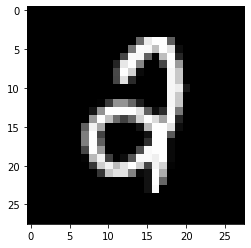

         My algorithm predict it to be   [6]
            Actually it is  [2]



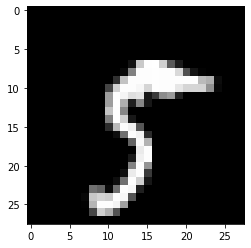

         My algorithm predict it to be   [3]
            Actually it is  [5]



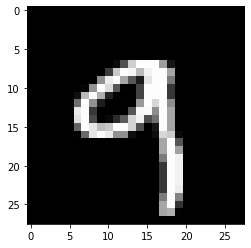

         My algorithm predict it to be   [9]
            Actually it is  [9]



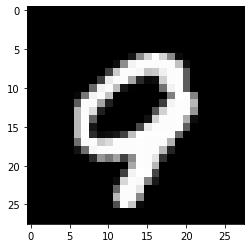

         My algorithm predict it to be   [9]
            Actually it is  [9]



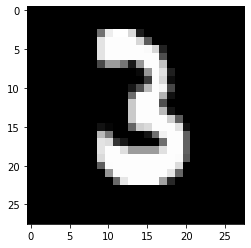

         My algorithm predict it to be   [3]
            Actually it is  [3]



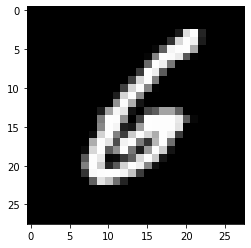

         My algorithm predict it to be   [6]
            Actually it is  [6]



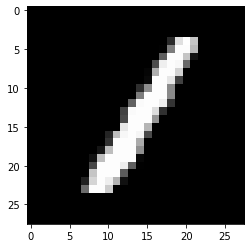

         My algorithm predict it to be   [1]
            Actually it is  [1]



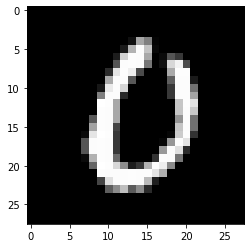

         My algorithm predict it to be   [0]
            Actually it is  [0]



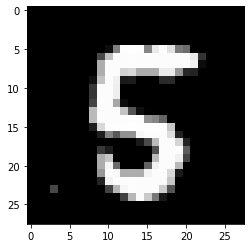

         My algorithm predict it to be   [5]
            Actually it is  [5]



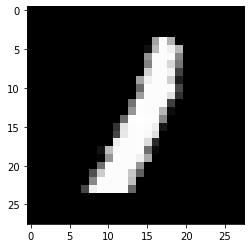

         My algorithm predict it to be   [1]
            Actually it is  [1]



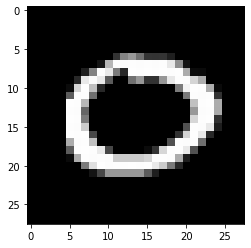

         My algorithm predict it to be   [0]
            Actually it is  [0]



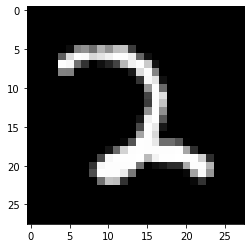

         My algorithm predict it to be   [2]
            Actually it is  [2]



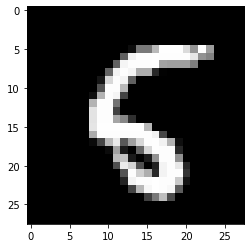

         My algorithm predict it to be   [6]
            Actually it is  [5]



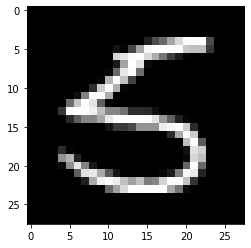

         My algorithm predict it to be   [5]
            Actually it is  [5]



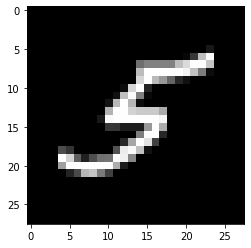

         My algorithm predict it to be   [5]
            Actually it is  [5]



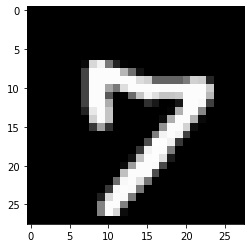

         My algorithm predict it to be   [7]
            Actually it is  [7]



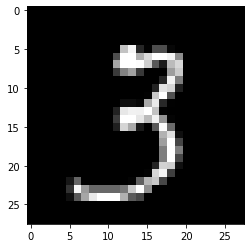

         My algorithm predict it to be   [3]
            Actually it is  [3]



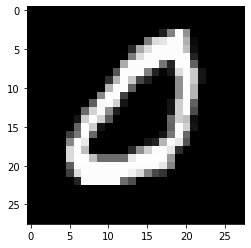

         My algorithm predict it to be   [0]
            Actually it is  [0]



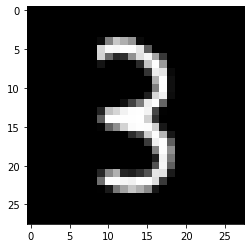

         My algorithm predict it to be   [3]
            Actually it is  [3]



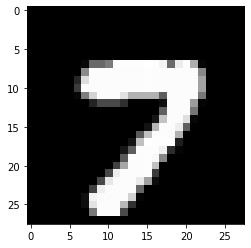

         My algorithm predict it to be   [7]
            Actually it is  [7]



In [51]:
X_rand1=(X_rand.T)*256
import matplotlib.pyplot as plt
import numpy as np
 
#X = np.random.random((100, 100)) # sample 2D array
for i1 in range(0,20):
    plt.imshow(X_rand1[i1].reshape([28,28]), cmap="gray")
    plt.show()
    print("         My algorithm predict it to be  ",output_rand[i1])
    print("            Actually it is ",Y_rand[i1])
    
     
    print()
    

# For 1st number even I had hard time guessing what it is !